# Lab: Central Limit Theorem

Authors: Yuna Liu and Kun Han

Date: 2022/1/21

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as scs
from scipy.stats import norm

## Uppgifter 1

In this exercise, we generate random variable $X$ for different sample sizes and simulate for 1000 times to calculate the mean $\bar X$ and standardlized sample mean. As changing the sample sizes, we observe and compare the histograms and curves by using Central Limit Theorem. Expected mean value $\mu_{\bar X}$, standard devition $\sigma_{\bar X}$ and confidence interval will be calculated and hypothesis will be discussed.

<h3>Expected mean and standard deviation can be calculated by:</h3>

$ \mu_{\bar X} = E(X) = \frac{1}{n}\sum_{i=1}^{n} X_i$ 

$\sigma_{\bar X} = \sqrt{V(X)} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i - \mu_{\bar X})^2}$

where $ X_i$ is the observations in population

In [75]:
# calculate the population mean my
my = (4+5+6+7)/4

# standard deviation of population: sigma
sigma = np.sqrt((1/4)*(4-my)**2 + (1/4)*(5-my)**2 + (1/4)*(6-my)**2 + (1/4)*(7-my)**2).round(2)

def CLT_test(sample_size, N_samples):
    
    sample_mean = lambda sample_size:np.mean(np.random.randint(4,8,sample_size)) # function for sample mean
    standlized_samples = [(sample_mean(sample_size)-my)/(sigma/np.sqrt(sample_size)) for i in range(N_samples)] # loop for standlized samples
    
    plt.figure(figsize=(20,10))
    sns.distplot(standlized_samples)
    plt.title('CLT distribution', fontsize=15)
    plt.xlabel('Standardized Sample Mean', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.show()

# Defind a function for sample size and the number of loops
# Return the histogram figures

C:\Users\Kun\.virtualenvs\DataBehandling-KunHan-DAT1fURC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


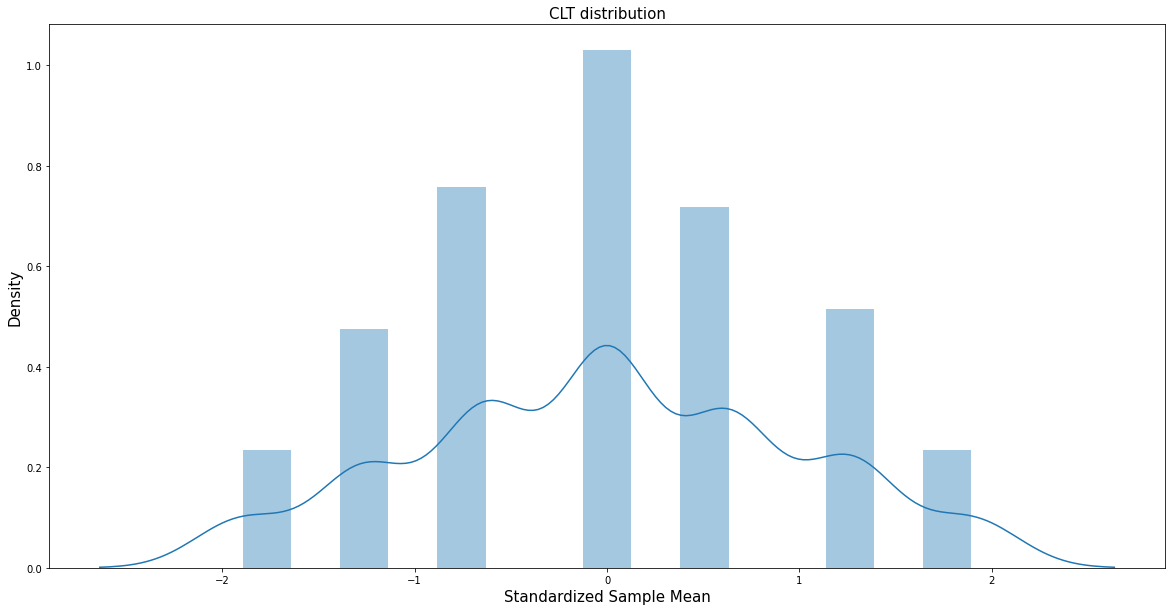

In [76]:
CLT_test(2,1000)

When using the sample size of 2, the sample mean tend to be near our standardized mean 0. However, the curve is not seems to be normal distributed.

C:\Users\Kun\.virtualenvs\DataBehandling-KunHan-DAT1fURC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


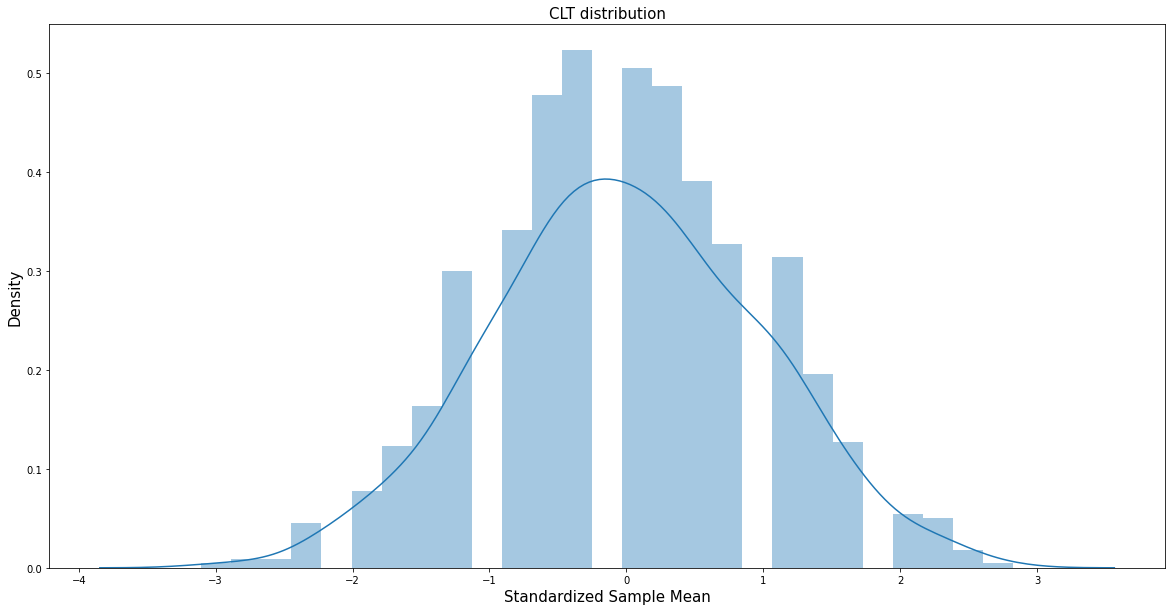

In [77]:
CLT_test(10,1000)

The shape become more smoothy.

C:\Users\Kun\.virtualenvs\DataBehandling-KunHan-DAT1fURC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


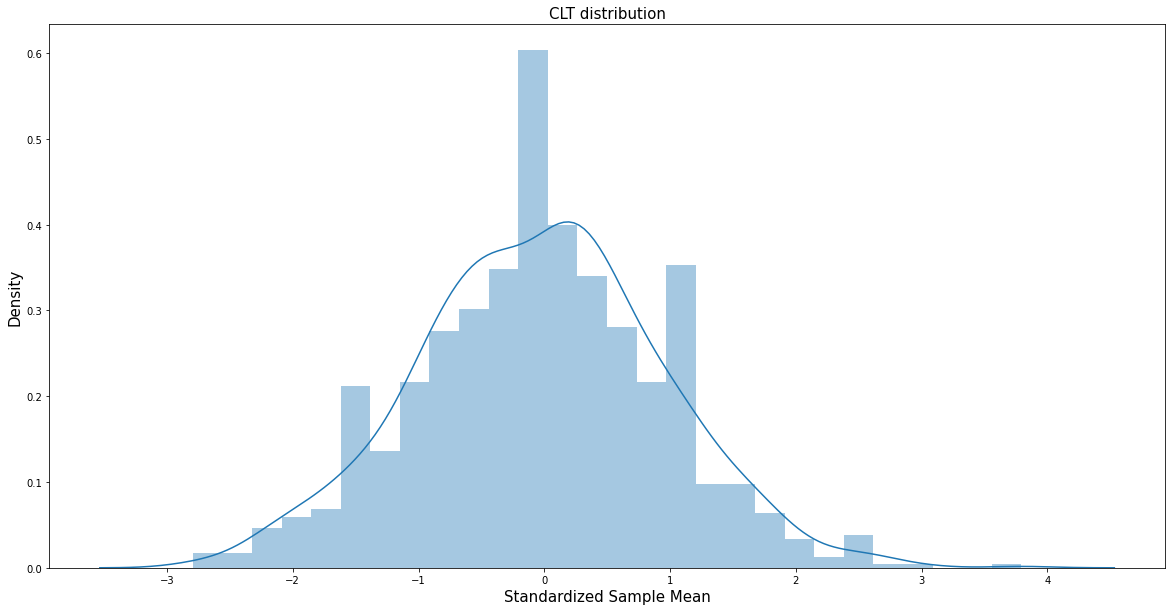

In [78]:
CLT_test(20,1000)

The curve perform better to be normal distributed when we adjust the sample size to 20.

C:\Users\Kun\.virtualenvs\DataBehandling-KunHan-DAT1fURC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


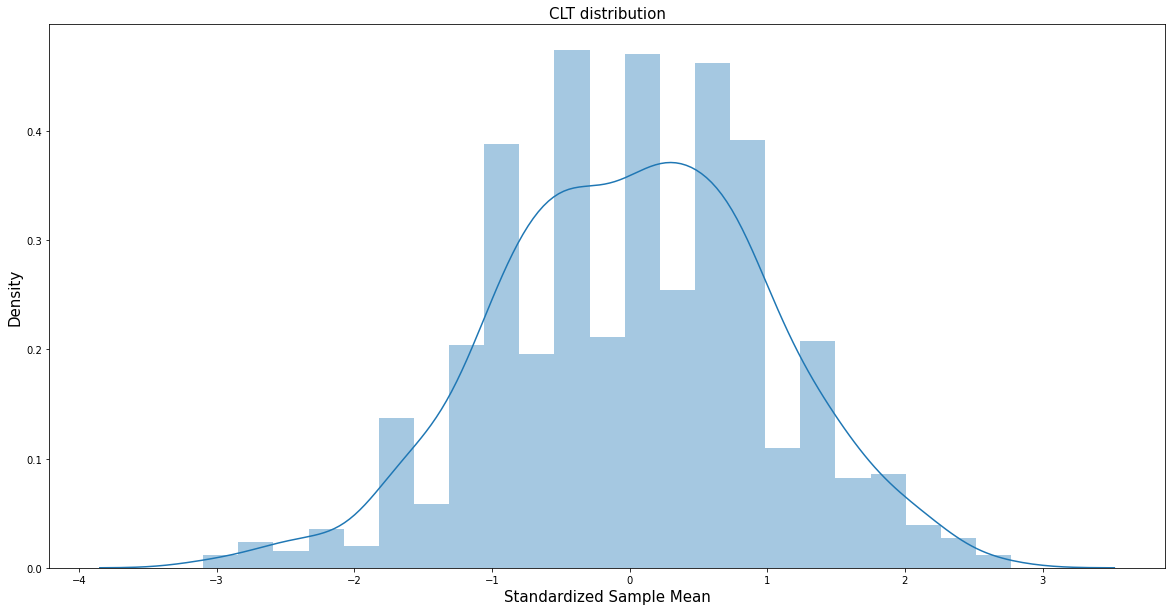

In [79]:
CLT_test(30,1000)

The more samples we take, the more likely that the sampling distribution of the mean will be narmal distributed.

C:\Users\Kun\.virtualenvs\DataBehandling-KunHan-DAT1fURC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


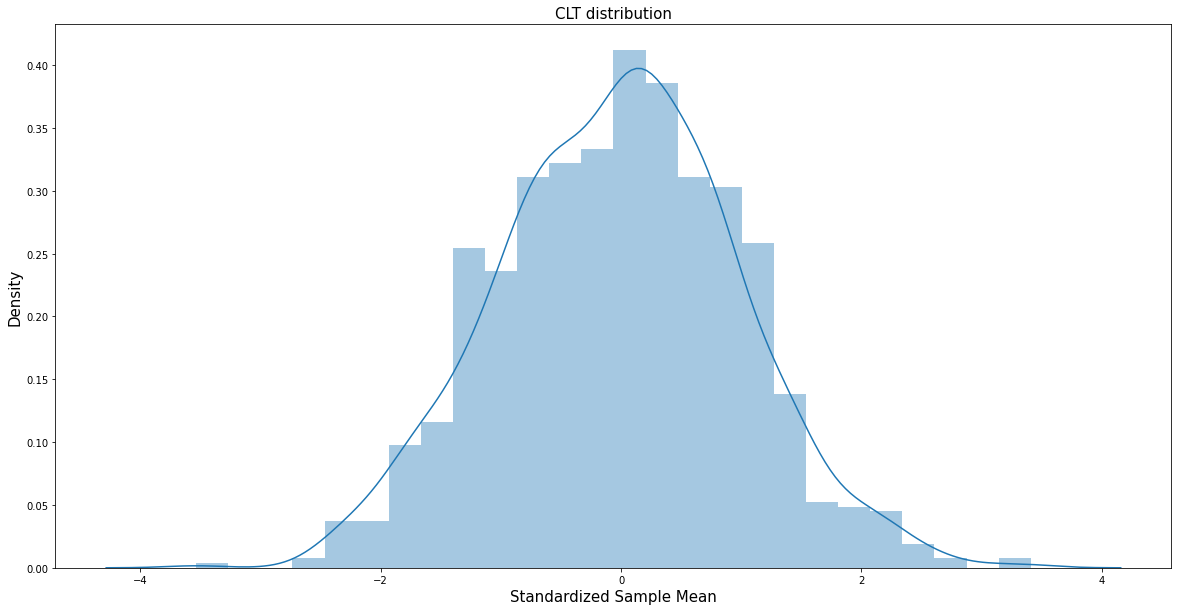

In [82]:
CLT_test(50,1000)

From the previous figures, we found that the distribution of the standarized sample mean trends to be normal distribution(informally a " bell curve " with mean equal to 0) as n becomes larger. The underlying theorem is Central Limit Theorem. As n is large, the distribution of the standarized sample mean becomes normal distribution

### Confidence interval can be calculate by equation:

${\bar x}\pm Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$

Because the standard diviation of population $\sigma$ is known

In [84]:
samples=1000
n=50
count=0

for x in range(samples):
    sample_n=np.random.randint(4,8,n)
    x_bar_n=sample_n.mean()
    #create 95% confidence interval for population mean
    # scs.norm.ppf(.975).round(2) is 1.96
    z_critical_value = scs.norm.ppf(1-.05/2).round(2)
    up_limit = x_bar_n + z_critical_value*sigma/np.sqrt(n)
    down_limit = x_bar_n - z_critical_value*sigma/np.sqrt(n)
    if down_limit < my < up_limit:
        count += 1 
print(f'For {count} of 1000 times, the confidence interval includes the population mean, which is a proportion of {count/samples*100:.2f}%')

For 957 of 1000 times, the confidence interval includes the population mean, which is a proportion of 95.70%


Around 95% of times does the population mean fall into in the confidence interval. This expectation is approximately the same as the test result.

### Now suppose we want to do a hypothesis test for the population mean with

$H_0: \mu \leq 5.1$

$H_A: \mu > 5.1$

with the significant level $0.05$

Here the population $\sigma$ is known so we need calculate the $z$ value and $P$-value:

$z = \frac {\bar x - \mu} {\frac{\sigma}{\sqrt{n}}}$

Because it is a one side test, so $P$-value will be $P(Z>z)$

In [142]:
samples=1000
n=50
count=0


for x in range(samples):
    sample_n=np.random.randint(4,8,n)
    x_bar_n=sample_n.mean()

    test = (x_bar_n-5.1)/(sigma/np.sqrt(n)) # Z value
    p_värde = norm.cdf(test) 

    if 1-p_värde < 0.05: # significant value 0.05
        count += 1 

print(f'For {count} of 1000 times, the noll hypothesis can be rejected, which means that, the my is more than 5.1.')

For 803 of 1000 times, the noll hypothesis can be rejected, which means that, the my is more than 5.1.
